In [65]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from setuptools.command.editable_wheel import InformationOnly

In [66]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [67]:
# Load the dataset
data_path = 'Titanic-Dataset.csv'
data = pd.read_csv(data_path)

In [68]:
# Overview of the dataset
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [69]:
print("\nBasic Info:")
print(data.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Data Information

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [70]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [71]:
# Check for missing values
print("\nMissing Values (Before Filling):")
print(data.isnull().sum())


Missing Values (Before Filling):
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [72]:
data = data[data['Age'].notna()]
#Dropping column Cabin since most of the values are Null in the column
data = data.drop('Cabin', axis=1)
data.fillna(data.mode().iloc[0], inplace=True)

In [73]:
print("\nMissing Values (After Filling):")
print(data.isnull().sum())


Missing Values (After Filling):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


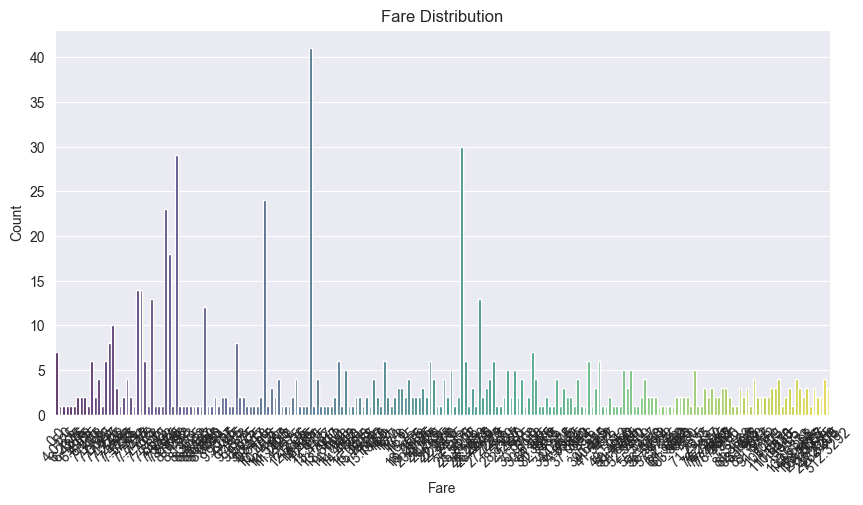

In [74]:
# Visualizations

# 1. Distribution of adoption likelihood
sns.countplot(x='Fare', data=data, palette='viridis')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.rcParams['figure.figsize'] = [10, 5]
plt.xticks(rotation=45)
plt.show()

This shows that the Fare Column data distribution is not normal distribution.

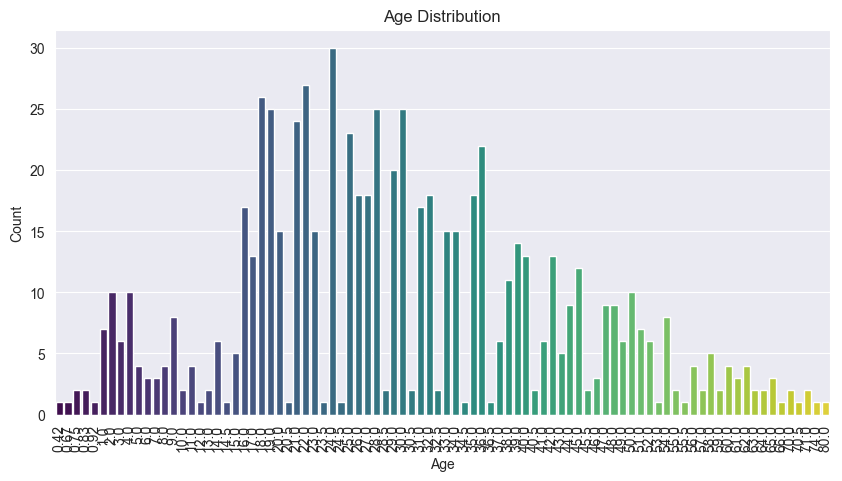

In [75]:
sns.countplot(x='Age', data=data, palette='viridis')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.rcParams['figure.figsize'] = [10, 5]
plt.xticks(rotation=90)
plt.show()

This shows that the age distribution is normal distribtion

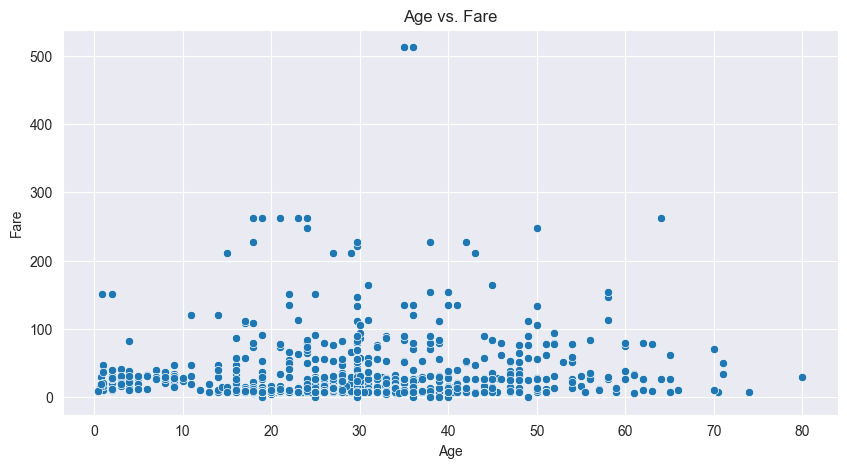

In [59]:
# 2. Scatter plot for Age vs. Fare in Shelter
sns.scatterplot(
    x='Age',
    y='Fare',
    data=data,
    palette='coolwarm'
)
plt.title("Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

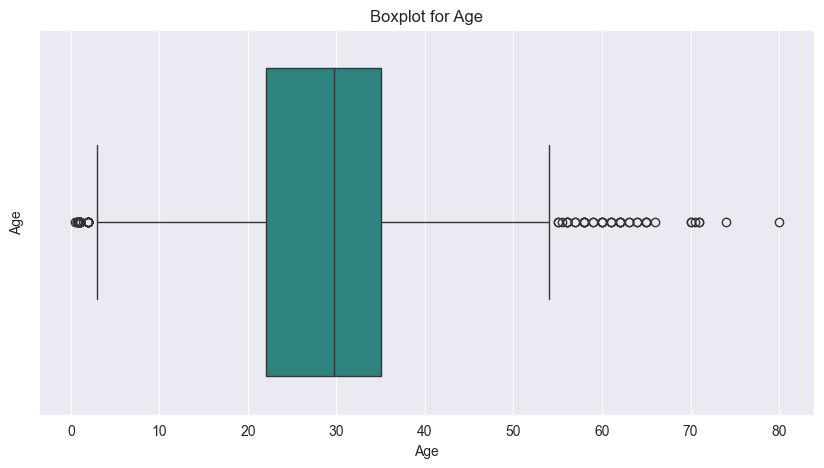

In [60]:
sns.boxplot(x='Age', data=data, palette='viridis')
# Add title and labels
plt.title("Boxplot for Age")
plt.ylabel("Age")
# Display the plot
plt.show()

In [86]:
age_mean = data["Age"].mean()
print(f"Age Mean: {age_mean}")
fare_mean = data["Fare"].mean()
print(f"Fare Mean: {fare_mean}")

Age Mean: 29.69911764705882
Fare Mean: 34.694514005602244
